# World Happiness Report Project

# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

# What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width. The lowest scores observed for the six key variables, therefore, characterize Dystopia. Since life would be very unpleasant in a country with the world’s lowest incomes, lowest life expectancy, lowest generosity, most corruption, least freedom and least social support, it is referred to as “Dystopia,” in contrast to Utopia.

# What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

# What do the columns succeeding the Happiness Score(like Family, Generosity, etc.) describe?

The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.
The Dystopia Residual is already provided in the dataset. 

If you add all these factors up, you get the happiness score so it might be un-reliable to model them to predict Happiness Scores.

You need to predict the happiness score considering all the other factors mentioned in the dataset.

# Dataset Link

https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/World%20Happiness/happiness_score_dataset.csv

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression, Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore,boxcox
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,BaggingRegressor,ExtraTreesRegressor,StackingRegressor,VotingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [219]:
happiness=pd.read_csv(r'C:\Users\KIRUTHIKA\OneDrive\Documents\PG Program in Data Science Machine Learning and Neural Network\Internship\Datasets\happiness_score_dataset.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [221]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [223]:
happiness.shape

(158, 12)

In [225]:
happiness.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [227]:
happiness.duplicated().sum()

0

In [229]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [231]:
happiness['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

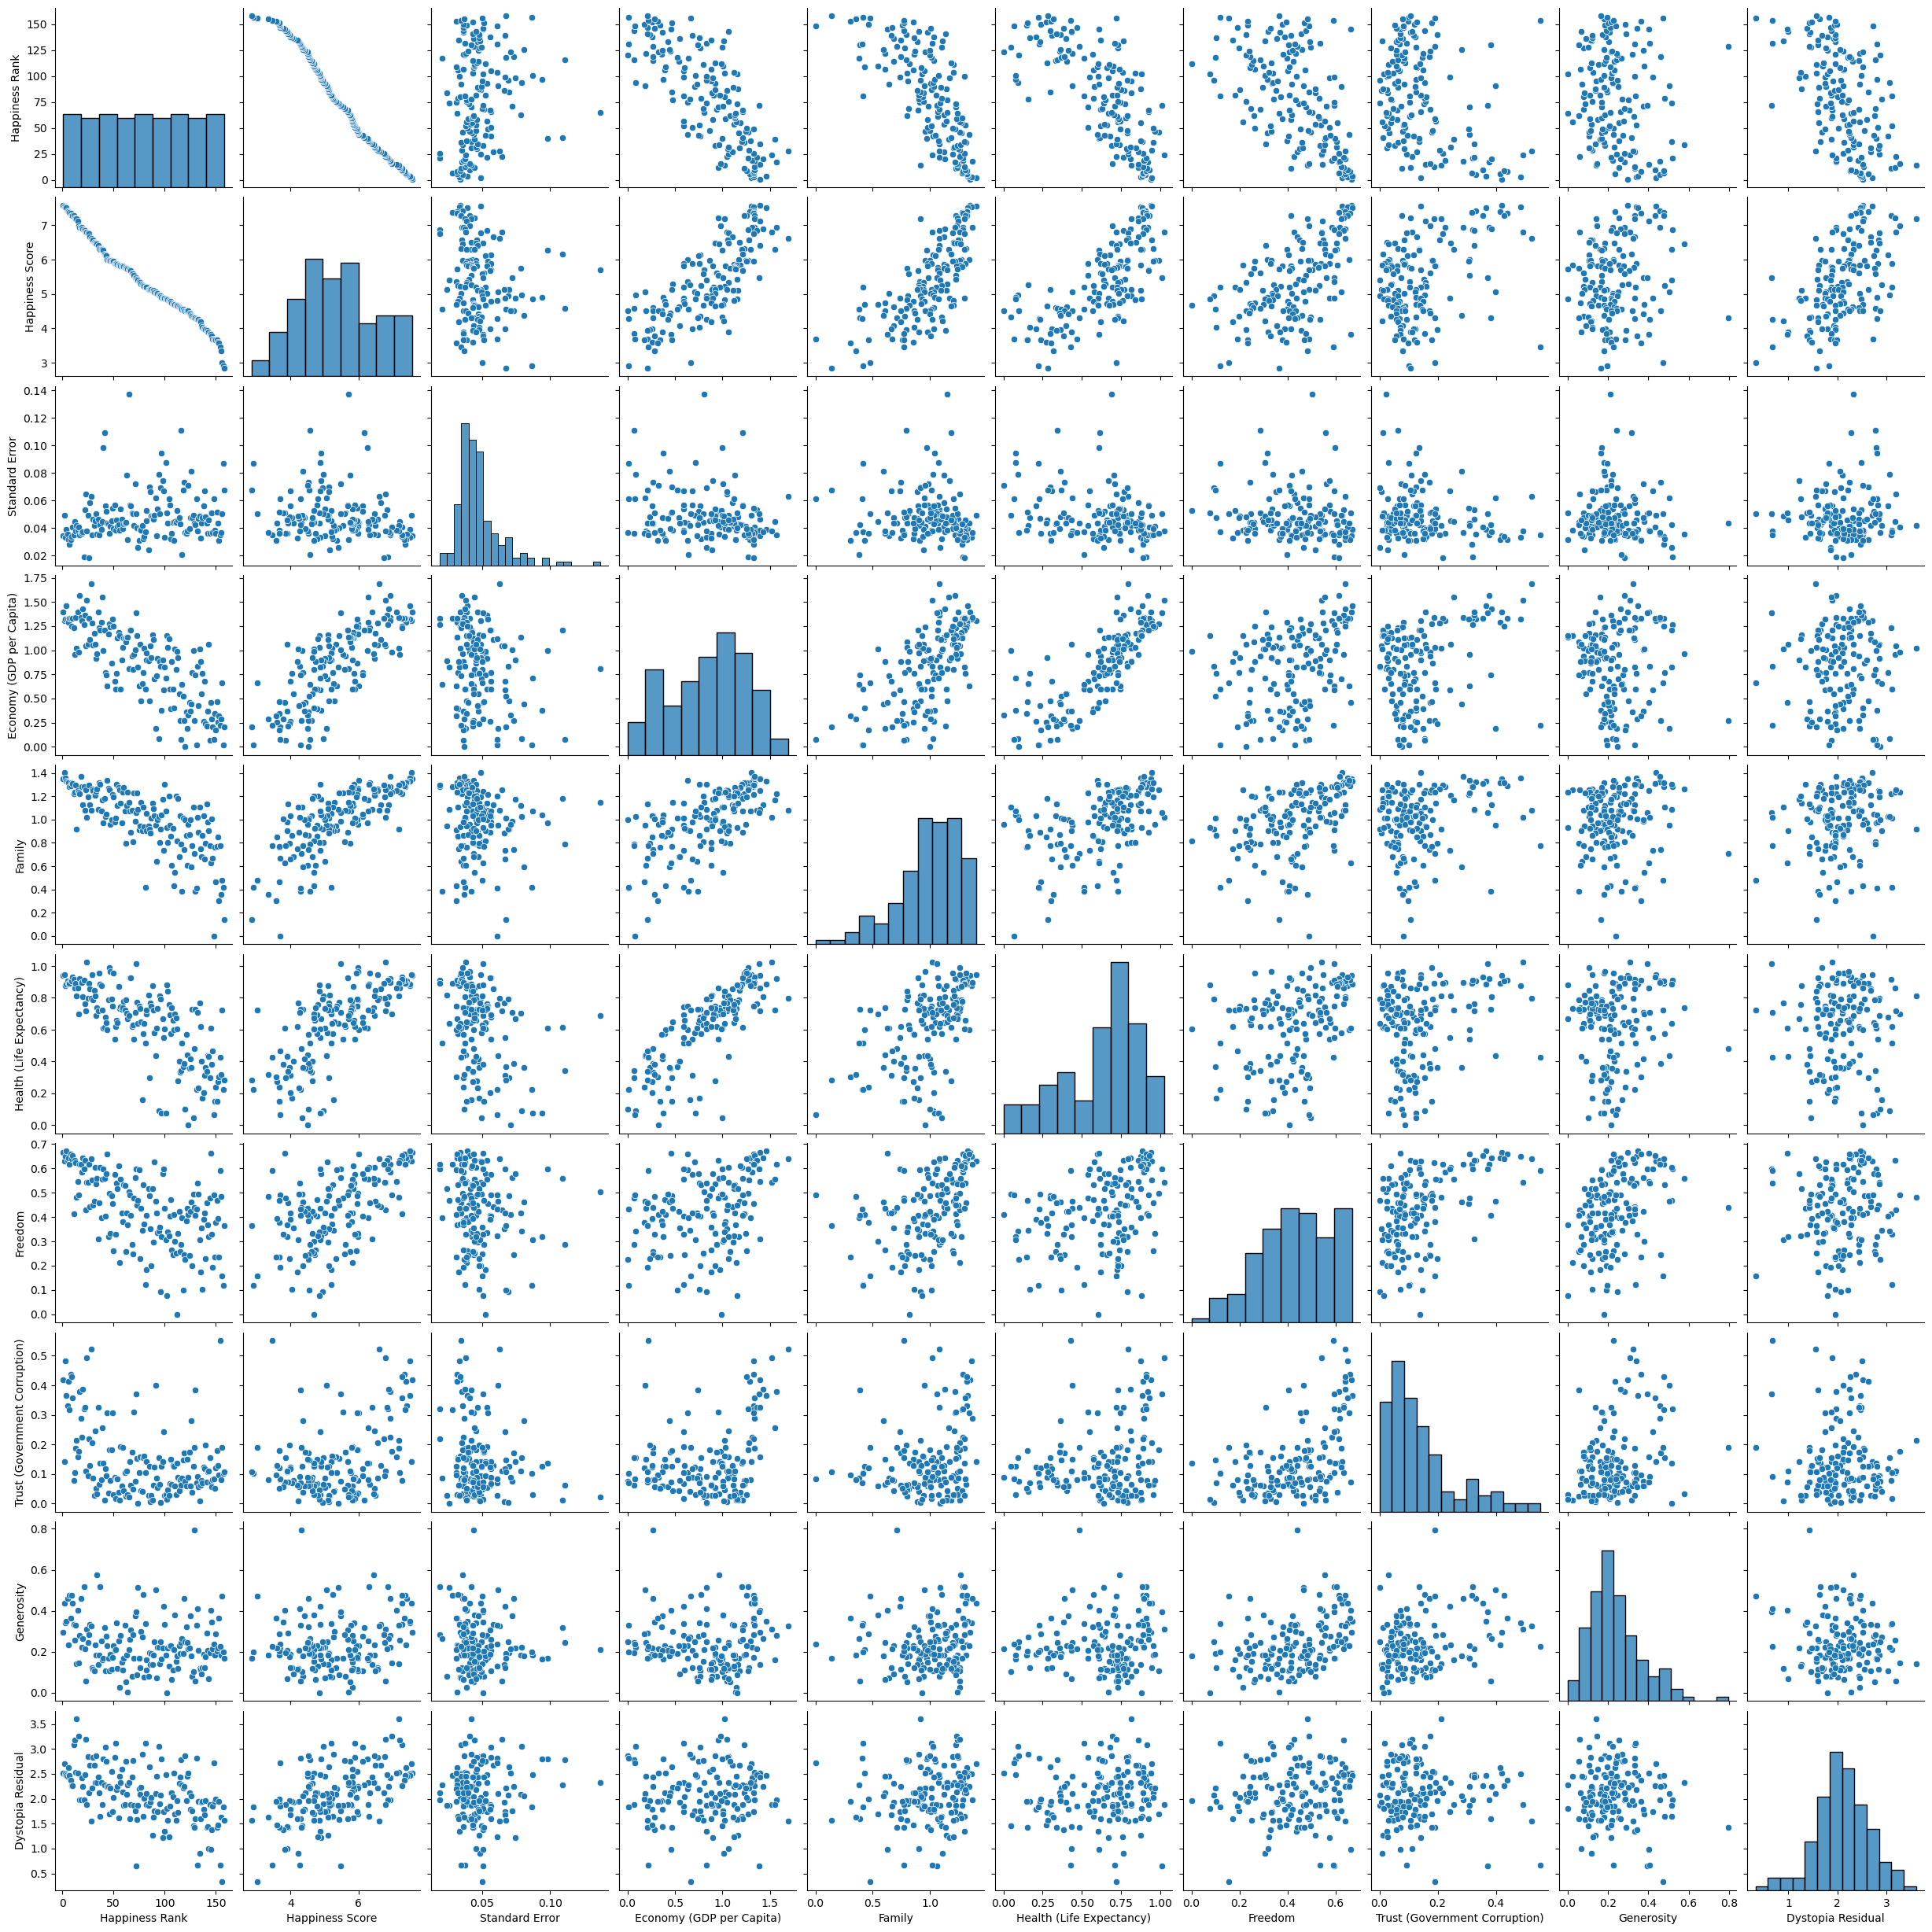

In [233]:
sns.pairplot(data=happiness)

<Axes: xlabel='Economy (GDP per Capita)', ylabel='Happiness Score'>

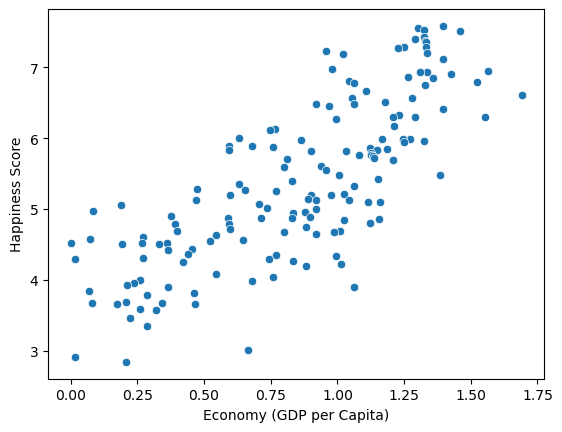

In [235]:
sns.scatterplot(data=happiness,x='Economy (GDP per Capita)',y='Happiness Score')

<Axes: xlabel='Family', ylabel='Happiness Score'>

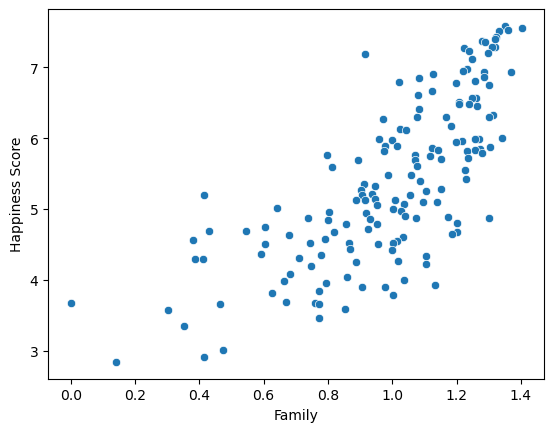

In [237]:
sns.scatterplot(data=happiness,x='Family',y='Happiness Score')

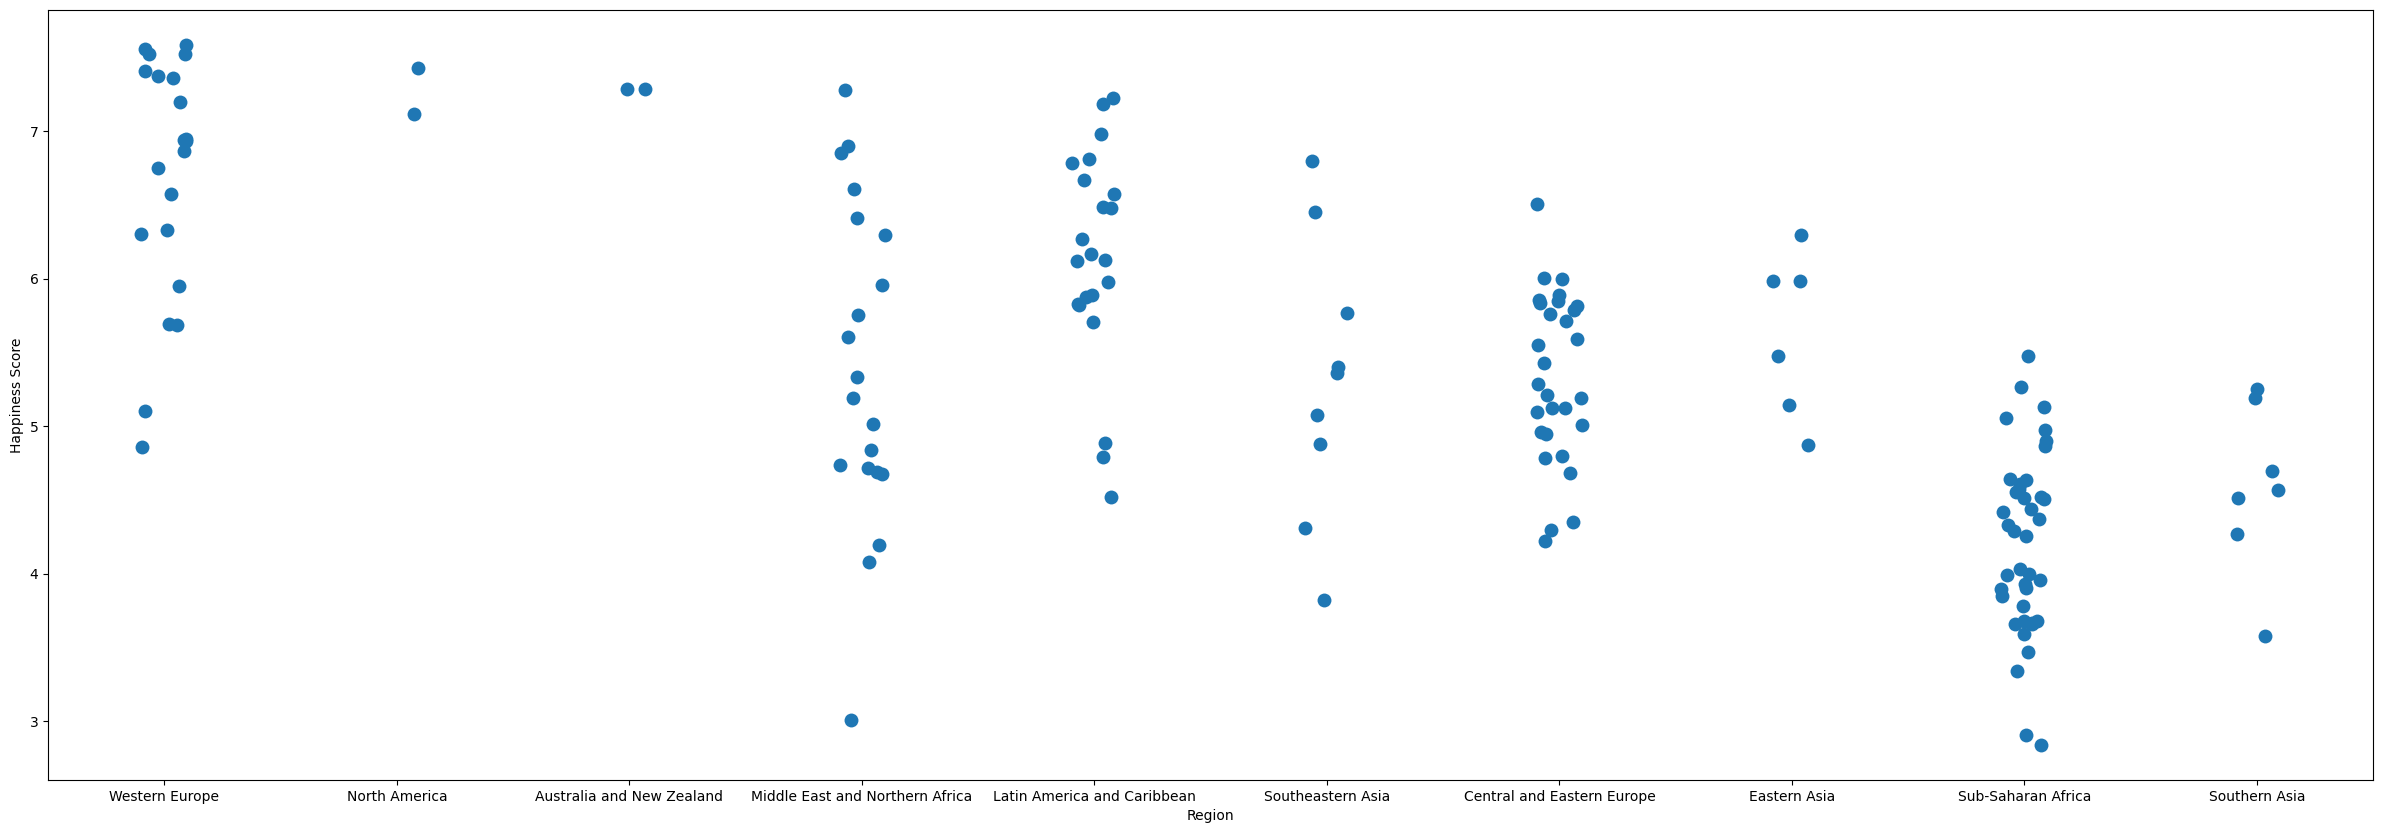

In [239]:
#Happiness Score for each region

plt.figure(figsize=(30,10))
sns.stripplot(data=happiness,x='Region',y='Happiness Score',size=10)
plt.show()

<Axes: xlabel='Generosity', ylabel='Happiness Score'>

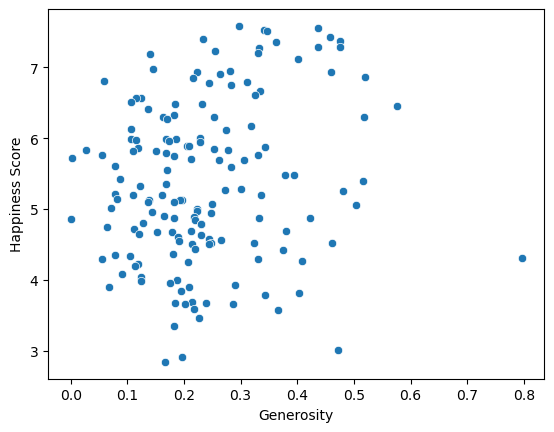

In [241]:
sns.scatterplot(data=happiness,x='Generosity',y='Happiness Score')

In [243]:
columns_used=happiness.drop(columns=['Country','Region'],axis=1)
columns_used.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


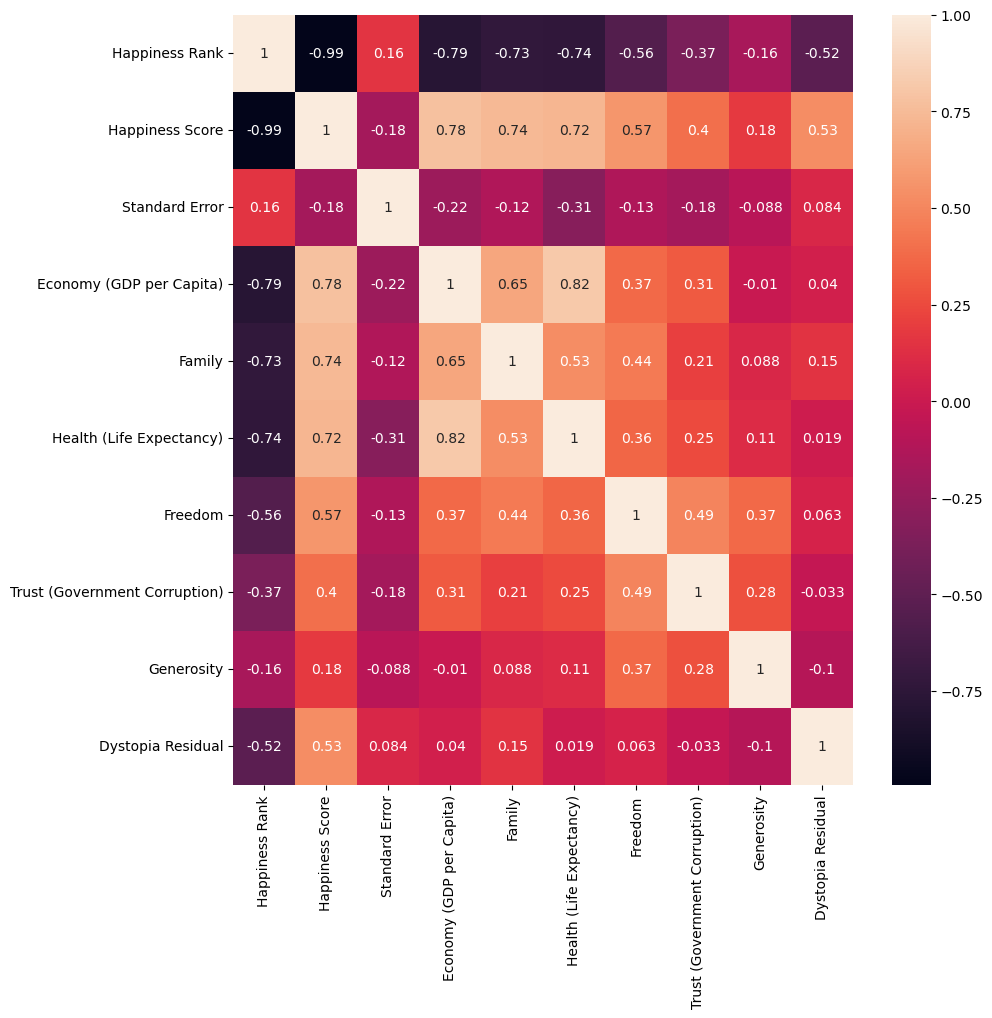

In [245]:
#check for correlation
plt.figure(figsize=(10,10))
sns.heatmap(data=columns_used.corr(),annot=True)
plt.show()

In [247]:
#check for skewness in the dataset
columns_used.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [249]:
#Apply Log transformation to remove skewness in the dataset
columns_used['Standard Error']=boxcox(columns_used['Standard Error'],0)
columns_used['Trust (Government Corruption)']=boxcox(columns_used['Trust (Government Corruption)'],0.5)
columns_used['Generosity']=boxcox(columns_used['Generosity'],0.5)

In [251]:
columns_used.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   0.484623
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    0.507663
Generosity                      -0.130961
Dystopia Residual               -0.238911
dtype: float64

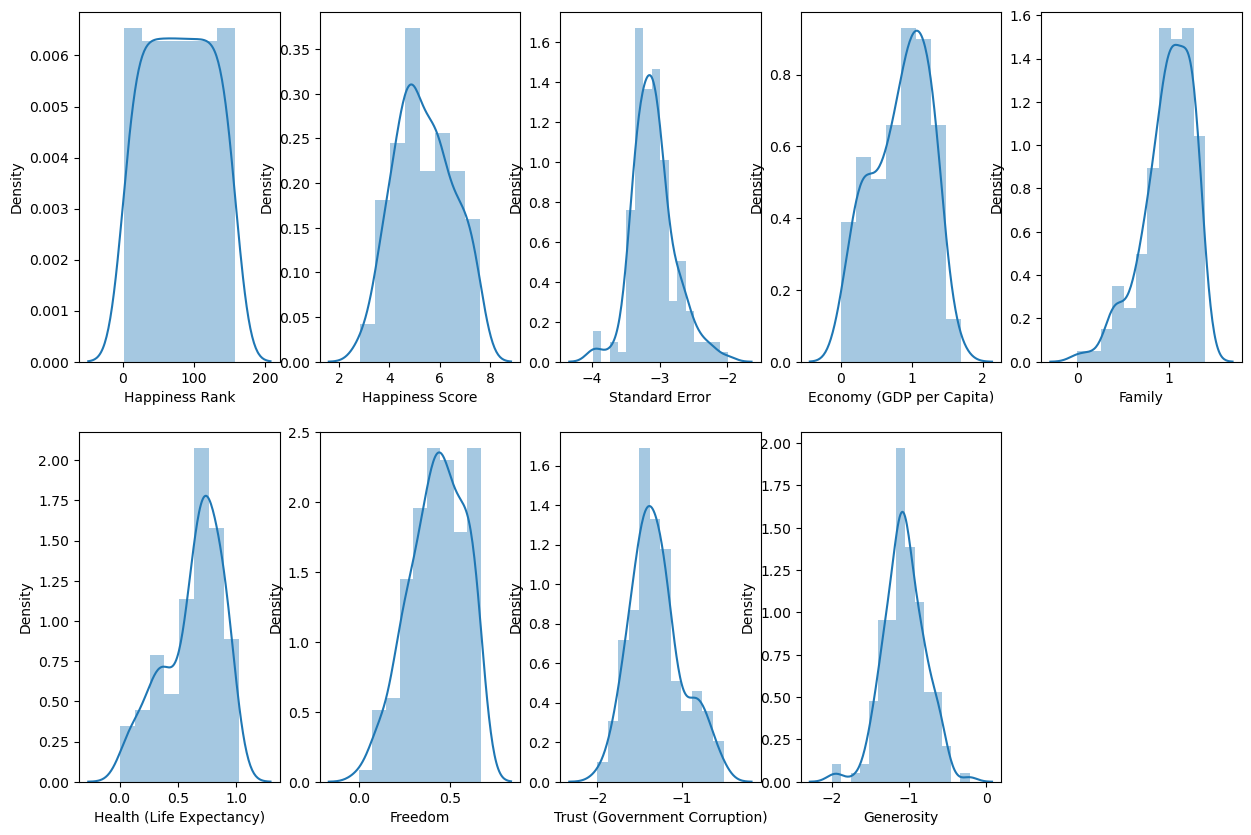

In [253]:
plt.figure(figsize=(15,10))
p=1
for i in columns_used:
    if p<10:
        plt.subplot(2,5,p)
        sns.distplot(columns_used[i])
    p=p+1
plt.show()

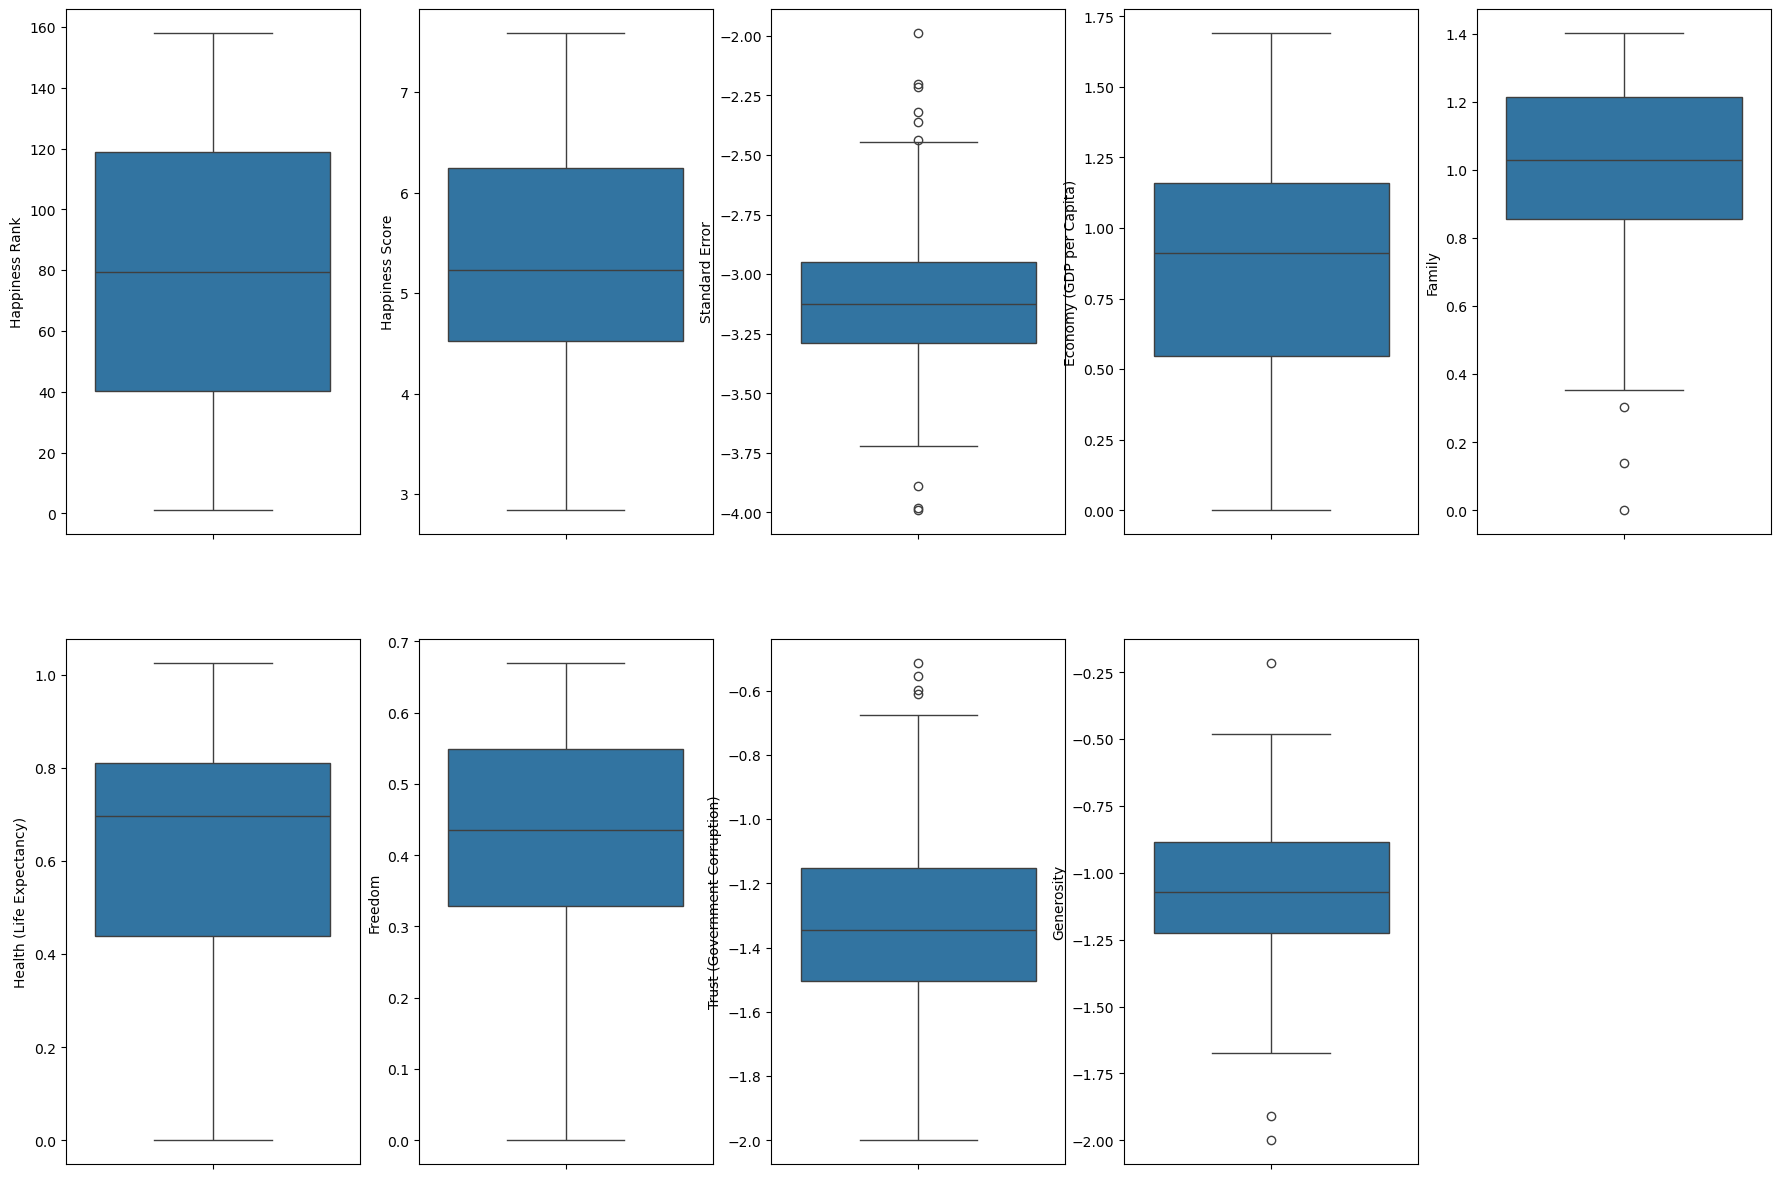

In [254]:
#check for the outliers in the dataset
plt.figure(figsize=(22,15))
p=1
for i in columns_used:
    if p<10:
        plt.subplot(2,5,p)
        sns.boxplot(columns_used[i])
    p=p+1
plt.show()

In [257]:
z=np.abs(zscore(columns_used))
z

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.721000,1.937360,0.915376,1.369621,1.320281,1.263408,1.577438,1.994534,0.572055,0.758258
1,1.699075,1.914581,0.229364,1.135226,1.514458,1.289434,1.332456,0.190088,1.440806,1.092857
2,1.677149,1.884792,0.993935,1.192861,1.361054,0.992229,1.469659,2.309792,0.868586,0.712335
3,1.655224,1.880411,0.504531,1.525130,1.251922,1.035145,1.605131,1.704241,0.904406,0.663893
4,1.633299,1.797179,0.785305,1.194876,1.221204,1.118054,1.360416,1.504447,1.563200,0.639337
...,...,...,...,...,...,...,...,...,...,...
153,1.633576,1.674055,0.866206,1.552987,0.800520,0.818610,1.087740,2.625227,0.053557,2.588925
154,1.655501,1.783571,0.694170,1.392303,2.346860,1.263362,0.372033,0.427838,0.309478,0.843967
155,1.677427,2.076199,0.313775,0.455245,1.901086,0.372199,1.809238,0.579860,1.638487,3.208430
156,1.699352,2.164688,2.055159,2.067566,2.118467,1.649648,2.064472,0.200879,0.183139,0.481985


In [259]:
np.where(z>3)

(array([ 63,  64, 101, 128, 147, 155, 157], dtype=int64),
 array([8, 2, 8, 8, 4, 9, 4], dtype=int64))

In [261]:
happiness_data=columns_used[(z<3).all(axis=1)]
happiness_data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,-3.378165,1.39651,1.34951,0.94143,0.66557,-0.704191,-0.910450,2.51738
1,2,7.561,-3.019206,1.30232,1.40223,0.94784,0.62877,-1.247803,-0.678940,2.70201
2,3,7.527,-3.402799,1.32548,1.36058,0.87464,0.64938,-0.609216,-0.831428,2.49204
3,4,7.522,-3.249335,1.45900,1.33095,0.88521,0.66973,-0.791646,-0.821883,2.46531
4,5,7.427,-3.337378,1.32629,1.32261,0.90563,0.63297,-0.851836,-0.646324,2.45176


In [263]:
happiness_data.shape

(151, 10)

In [265]:
columns_used.shape

(158, 10)

In [267]:
#percentage of data loss
print("Data loss percentage",((columns_used.shape[0]-happiness_data.shape[0])/columns_used.shape[0])*100)

Data loss percentage 4.430379746835443


In [269]:
x=columns_used.drop(columns='Happiness Score',axis=1)
x.head()

,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,-3.378165,1.39651,1.34951,0.94143,0.66557,-0.704191,-0.910450,2.51738
1,2,-3.019206,1.30232,1.40223,0.94784,0.62877,-1.247803,-0.678940,2.70201
2,3,-3.402799,1.32548,1.36058,0.87464,0.64938,-0.609216,-0.831428,2.49204
3,4,-3.249335,1.45900,1.33095,0.88521,0.66973,-0.791646,-0.821883,2.46531
4,5,-3.337378,1.32629,1.32261,0.90563,0.63297,-0.851836,-0.646324,2.45176


In [271]:
y=columns_used['Happiness Score']
y.head()

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [273]:
#check for multicollinearity using VIF
def calc_vif(x):
    vif=pd.DataFrame()
    vif['Column']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [275]:
calc_vif(x)

,Column,VIF
0,Happiness Rank,26.771379
1,Standard Error,114.590637
2,Economy (GDP per Capita),27.435198
3,Family,30.392505
4,Health (Life Expectancy),29.754851
5,Freedom,14.583931
6,Trust (Government Corruption),31.872265
7,Generosity,25.983544
8,Dystopia Residual,30.121180


In [277]:
x.drop(columns='Standard Error',axis=1,inplace=True)

In [279]:
calc_vif(x)

,Column,VIF
0,Happiness Rank,11.664400
1,Economy (GDP per Capita),25.895392
2,Family,27.900555
3,Health (Life Expectancy),23.191889
4,Freedom,13.765044
5,Trust (Government Corruption),30.488542
6,Generosity,25.449865
7,Dystopia Residual,18.840430


In [281]:
sc=StandardScaler()
trainx=sc.fit_transform(x)
x_scaled=pd.DataFrame(trainx,columns=x.columns)
x_scaled.head()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-1.721000,1.369621,1.320281,1.263408,1.577438,1.994534,0.572055,0.758258
1,-1.699075,1.135226,1.514458,1.289434,1.332456,0.190088,1.440806,1.092857
2,-1.677149,1.192861,1.361054,0.992229,1.469659,2.309792,0.868586,0.712335
3,-1.655224,1.525130,1.251922,1.035145,1.605131,1.704241,0.904406,0.663893
4,-1.633299,1.194876,1.221204,1.118054,1.360416,1.504447,1.563200,0.639337


In [283]:
lr=LinearRegression()
ls=Lasso()
rg=Ridge()
els=ElasticNet()
svr=SVR()
knn=KNeighborsRegressor()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor()
grb=GradientBoostingRegressor()
ada=AdaBoostRegressor()
etr=ExtraTreesRegressor()
bag=BaggingRegressor()

In [285]:
#cross validation
model=[lr,ls,rg,els,svr,knn,dtr,rfr,grb,ada,etr,bag]
for i in model:
    cv=cross_val_score(i,x,y,cv=5,n_jobs=-1)
    print("Cross validation score for",i,"is","\n",cv,"mean of the cross validation is",np.mean(cv))

Cross validation score for LinearRegression() is 
 [0.95499414 0.94627037 0.96003682 0.91173311 0.98766454] mean of the cross validation is 0.9521397948209438
Cross validation score for Lasso() is 
 [-0.10367068  0.38603325  0.75598871  0.36940486  0.7307143 ] mean of the cross validation is 0.4276940875038333
Cross validation score for Ridge() is 
 [0.45905088 0.63672924 0.88446711 0.57719965 0.81790745] mean of the cross validation is 0.6750708660481436
Cross validation score for ElasticNet() is 
 [0.06773887 0.32893602 0.75662841 0.28255072 0.74189385] mean of the cross validation is 0.4355495747757178
Cross validation score for SVR() is 
 [-2.59542477  0.70575122  0.94170774  0.90593612 -3.15668816] mean of the cross validation is -0.6397435707287059
Cross validation score for KNeighborsRegressor() is 
 [-3.79322068 -0.48455808 -0.18900403 -0.41731096 -2.24125598] mean of the cross validation is -1.4250699463738687
Cross validation score for DecisionTreeRegressor() is 
 [-3.1806703

In [293]:
#Best Random state
maxacc=0
maxrs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc=r2_score(y_test,y_pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print("Accuracy Score is",maxacc,"and Best Random State is",maxrs)

Accuracy Score is 0.9993773933285137 and Best Random State is 26


In [295]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=26)

In [297]:
x_train.shape

(110, 8)

In [299]:
x_test.shape

(48, 8)

In [301]:
y_train.shape

(110,)

In [303]:
y_test.shape

(48,)

In [305]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    y_pred_train=i.predict(x_train)
    print("Performance Metrics for",i,"\n",)
    print("R-Score for training data", r2_score(y_train,y_pred_train))
    print("R-Score for test data",r2_score(y_test,y_pred))
    print("Mean Squared Error",mean_squared_error(y_test,y_pred))
    print("Mean Absolute Error",mean_absolute_error(y_test,y_pred))
    print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred)),"\n")

Performance Metrics for LinearRegression() 

R-Score for training data 0.9982765819738852
R-Score for test data 0.9993773933285137
Mean Squared Error 0.0009275266477485181
Mean Absolute Error 0.024399893239022835
Root Mean Squared Error 0.030455322158015635 

Performance Metrics for Lasso() 

R-Score for training data 0.09986027683543452
R-Score for test data 0.09683028318327713
Mean Squared Error 1.3454947050071875
Mean Absolute Error 0.9933326058001392
Root Mean Squared Error 1.159954613339327 

Performance Metrics for Ridge() 

R-Score for training data 0.9979936867562791
R-Score for test data 0.9991253847027575
Mean Squared Error 0.0013029558337116706
Mean Absolute Error 0.029243904866158143
Root Mean Squared Error 0.03609647951963835 

Performance Metrics for ElasticNet() 

R-Score for training data 0.5824747463003289
R-Score for test data 0.5773127980792752
Mean Squared Error 0.6296971449210451
Mean Absolute Error 0.6757746090918527
Root Mean Squared Error 0.7935345896185276 

Pe

In [307]:
#Improve the performance for ExtraTreeRegressor

grid_param={"fit_intercept":[True,False],"copy_X":[True,False]}

In [309]:
grid_param

{'fit_intercept': [True, False], 'copy_X': [True, False]}

In [311]:
gridcv=GridSearchCV(lr,param_grid=grid_param,cv=5,n_jobs=-1)

In [313]:
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False]})

In [315]:
gridcv.best_params_

{'copy_X': True, 'fit_intercept': True}

In [317]:
lr1=LinearRegression(fit_intercept=True,copy_X=True)
lr1.fit(x_train,y_train)
y_pred1=lr1.predict(x_test)
print(r2_score(y_test,y_pred1))

0.9993773933285137


In [319]:
#save the best model
import pickle
filename='happinessscore.pkl'
pickle.dump(lr1,open(filename,'wb'))

In [321]:
#Load the model
result=pickle.load(open('happinessscore.pkl','rb'))
result.score(x_test,y_test)

0.9993773933285137

In [323]:
#save the output in dataframe
df=pd.DataFrame([result.predict(x_test)[:],(y_test)[:]],index=["Predicted","Actual"])
df

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
Predicted,3.618284,5.613903,3.5728,5.141196,5.375361,5.466159,3.66958,6.85952,5.920411,5.204027,...,4.200227,6.59467,7.209314,7.37424,5.479765,7.186537,6.931051,5.115821,6.02513,4.343243
Actual,3.587000,5.605000,3.5750,5.098000,5.332000,5.429000,3.66700,6.85300,5.890000,5.194000,...,4.194000,6.57400,7.286000,7.40600,5.474000,7.187000,6.940000,5.073000,6.00300,4.332000
